# US Airline Passenger Satisfaction


# <span style='color:#86E5FF'><center style='background:#150050;padding:25px'>US Airline Passenger Satisfaction </center></span>

## <span style='color:#FF8B13'>Latar Belakang Masalah</span>
Kepuasan pelanggan memiliki pengaruh besar dan menjadi salah satu tolok ukur dapat bertahannya suatu usaha/bisnis. Kepuasan penumpang menjadi ukuran yang menentukan seberapa baik pelayanan memenuhi harapan penumpang.

Salah satu maskapai penerbangan di Amerika Serikat (AS) melakukan survei dengan tujuan untuk mengetahui kepuasan penumpang agar dapat meningkatkan kualitas pelayanan maskapai. Sehingga dapat memberikan dampak secara positif baik secara finansial maupun non-finansial untuk perusahaan.

## <span style='color:#FF8B13'>Rumusan Masalah</span>

Berikut rumusan masalah yang akan menjadi acuan dalam melakukan analisis:
1. Apakah penumpang maskapai merasa puas dengan layanan yang sudah diberikan secara keseluruhan?
2. Apa saja faktor yang mempengaruhi kepuasan penumpang?
3. Apa rekomendasi yang dapat diberikan kepada pihak maskapai untuk meningkatkan kualitas pelayanan mereka?


## <span style='color:#FF8B13'>Content</span>

##### Berikut detail dari dataset yang akan digunakan selama proses pengerjaan:

* ID : Nomor unik masing-masing penumpang
* Gender: Jenis Kelamin penumpang (*Female* (Perempuan), *Male*(Laki-laki))
* Customer Type: Tipe penumpang (*Loyal Customer*, *disloyal customer*)
* Age: Umur penumpang
* Type of Travel: Tujuan penerbangan (*Personal Travel*,*Business Travel*)
* Class: Kelas penerbangan (*Business*, *Eco*, *Eco Plus*)
* Flight distance: Jarak penerbangan
* Inflight wifi service: Level kepuasan terhadap wifi dalam penerbangan (0:*Tidak mengisi*;1-5)
<br>(mulai dari kolom berikut *Inflight wifi service* hingga *cleanliness*)
* Departure/Arrival time convenient: Level kepuasan terhadap keberangkatan atau kedatangan
* Ease of Online booking: Level kepuasan terhadap pemesanan tiket secara online
* Gate location: Level kepuasan terhadap lokasi pintu gerbang
* Food and drink: Level kepuasan terhadap makanan dan minuman
* Online boarding: Level kepuasan terhadap *boarding* online
* Seat comfort: Level kepuasan terhadap kenyamanan kursi
* Inflight entertainment: Level kepuasan terhadap hiburan dalam penerbangan
* On-board service: Level kepuasan terhadap pelayanan *on-board*
* Leg room service: Level kepuasan terhadap ruang kaki
* Baggage handling: Level kepuasan terhadap penanganan bagasi
* Check-in service: Level kepuasan terhadap pelayanan *check-in*
* Inflight service: Level kepuasan terhadap pelayanan dalam penerbangan
* Cleanliness: Level kepuasan terhadap kebersihan
* Departure Delay in Minutes: Menit keterlambatan keberangkatan
* Arrival Delay in Minutes: Menit keterlambatan kedatangan
* Satisfaction: Tingkat Kepuasan Pelanggan(*Satisfaction*, *neutral* *or* *dissatisfaction*)

## Preparation
Persiapan yang dilakukan dimulai dari melakukan *import library* yang dibutuhkan serta menyiapkan dataset yang digunakan

In [ ]:
%pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Purwadhika/Capstone/airline passanger satisfaction.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### <span style='color:#FF8B13'> Data Understanding and Cleaning </span>

Sebelum masuk kedalam proses analisis data langkah pertama yang dilakukan adalah proses data understanding dan data cleaning. Hal ini dilakukan agar kita dapat mengetahui ada nya anomali apa saja yang terdapat di dalam dataset yang sedang dikerjakan dan langkah yang perlu dilakukan dalam proses *data cleaning*.

##### <span style='color:#FF8B13'>A) Data Understanding</span>
Mengenal info kolom dan baris dari dataset, memeriksa data duplikat dan format data, serta menghapus kolom yang tidak relevan

In [3]:
print(f'Jumlah baris dan kolom pada dataset data adalah {data.shape}')

Jumlah baris dan kolom pada dataset data adalah (103904, 25)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Untuk melihat statistik deskriptif pada masing-masing kolom

In [8]:
display(data.describe(),
data.describe(include='object'))

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [9]:
pd.set_option('display.max_colwidth',1)

listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

TabelUnik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
TabelUnik

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
2,Gender,2,"[Male, Female]"
3,Customer Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
5,Type of Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"


Ada beberapa hal yang bisa kita dapat dari kolom diatas yaitu:
1. Untuk kolom ID serta kolom unnamed tidak relevan dalam membantu proses analisis untuk selanjutnya, sehingga dapat dihapus.
2. kolom *Arrival Delay in Minutes* memiliki data kosong.
3. Rentang nilai yang diberikan berada pada range nilai 1 (buruk) sampai dengan 5(baik). Nilai 0 yang diberikan kita tarik kesimpulan bahwa responden / penumpang tidak mengisi kolom penilaian tersebut. 
4. Pada kolom *Flight Distance* memiliki range data yang cukup besar, sehingga dapat dikelompokkan dalam beberapa kelompok.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Terlihat jumlah data Missing Value pada kolom *Arrival Delay in Minutes* sejumlah 310 data

### <span style='color:#FF8B13'> Melakuan Drop Column Yang Tidak Digunakan</span>

In [11]:

data = data.drop(data.iloc[:,[0, 1]], axis = 1)


In [12]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

<!-- Now the dataset information looks like this: -->

Tampilan data set baru setelah dilakukan drop column untuk kedua data yang tidak diperlukan

In [14]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##### <span style='color:#FF8B13'>B) Data Cleaning</span>
Selanjutnya akan di cek apabila terdapat missing value pada data:

In [15]:
data.isnull().sum()


Gender                               0  
Customer Type                        0  
Age                                  0  
Type of Travel                       0  
Class                                0  
Flight Distance                      0  
Inflight wifi service                0  
Departure/Arrival time convenient    0  
Ease of Online booking               0  
Gate location                        0  
Food and drink                       0  
Online boarding                      0  
Seat comfort                         0  
Inflight entertainment               0  
On-board service                     0  
Leg room service                     0  
Baggage handling                     0  
Checkin service                      0  
Inflight service                     0  
Cleanliness                          0  
Departure Delay in Minutes           0  
Arrival Delay in Minutes             310
satisfaction                         0  
dtype: int64

Dapat dilihat bahwa missing value terdapat pada kolom *Arrival_Delay_in_Minutes*
<br>Sambil dilakukan pengecekan persentase data kosong: 

In [18]:
persentase = (data['Arrival Delay in Minutes'].isnull().sum()/data.shape[0]*100)
print(f'Nilai persentase missing value sebesar {persentase}')

data.isnull().sum()/data.shape[0]*100


Nilai persentase missing value sebesar 0.29835232522328303


Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

- Persentase nilai data kosong pada kolom *Arrival Delay in Minutes* cukup kecil berada dibawah angka 50%.
- Hal selanjutnya yang perlu dilakukan yaitu menangani *missing value* tersebut. Terdapat 2 data mengenai keterlambatan, yaitu *Arrival Delay in Minutes * dan *Departure Delay in Minutes* 
- Kemungkinan terbesar yaitu apabila terjadi keterlambatan pada saat keberangkatan, maka akan terjadi juga keterlambatan saat kedatangan pesawat.
- Sehingga hal yang perlu dilakukan berikutnya adalah melakukan analisa korelasi pada kedua kolom tersebut.
- Jika didapati ada korelasi yang kuat antara kedua variabel tersebut, maka dapat disimpulkan bahwa variabel lainnya juga terpengaruh dengan cara yang sama.

In [20]:
stats, pval=normaltest(data['Departure Delay in Minutes'])
if pval<=0.05:
    print('data tersebut tidak terdistribusi normal') #Ha
else: 
    print('data tersebut berdistribusi normal') #Ho 

data tersebut tidak terdistribusi normal


In [21]:
data[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr('spearman')

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.740843
Departure Delay in Minutes,0.740843,1.000000


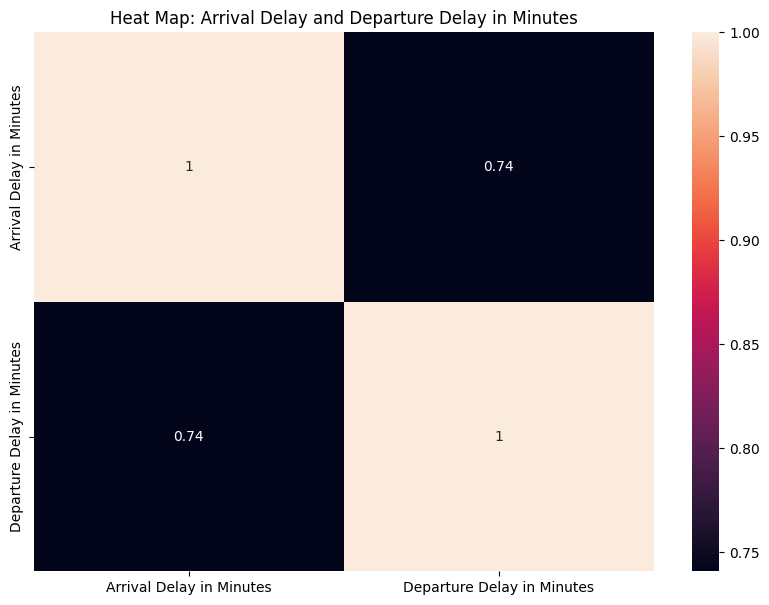

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(data[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr('spearman'), annot= True)
plt.title('Heat Map: Arrival Delay and Departure Delay in Minutes', color='Black')
plt.show()


Ada 2 cara untuk menangani *missing value*:
* Pertama dengan menghapus baris/kolom yang berisi *missing value*. (dropna)
* Kedua dengan mengisi data yang hilang. (fillna)

Karena korelasi dua kolom tersebut cukup tinggi yaitu sebesar  74,1% dan kolom *Arrival Delay in Minutes* memiliki *missing value*, maka proses yang akan dilakukan untuk menangani *missing value* yaitu dengan menggunakan cara pertama / menghapus kolom *Arrival Delay in Minutes*

In [30]:
data.drop('Arrival Delay in Minutes',axis=1,inplace=True)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


### <span style='color:#FF8B13'>C) Pengecekan Outlier:</span>
- Outlier merupakan data yang berbeda secara signifikan dibanding data lainnya.
- Outlier dapat mempengaruhi hasil pengambilan keputusan setelah analisa.

Pengecekan data outlier dilakukan menggunakan boxplot, karena kemudahan untuk membaca dan mengetahui data outlier bila menggunakan boxplot.

Outlier pada kolom Departure Delay in Minutes

<AxesSubplot: xlabel='Departure Delay in Minutes'>

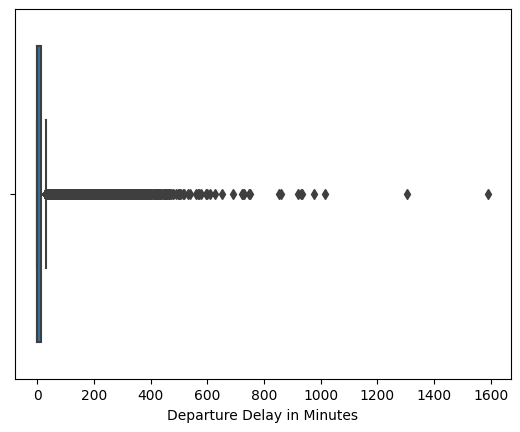

In [28]:
sns.boxplot(x=data['Departure Delay in Minutes'])

Outlier pada kolom Flight Distance

<AxesSubplot: xlabel='Flight Distance'>

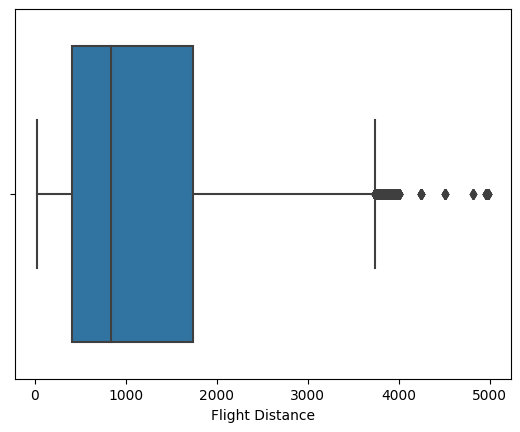

In [32]:
sns.boxplot(x=data['Flight Distance'])

Pada grafik boxplot diatas terlihat bahwa terdapat beberapa outlier.

Kemudian dilakukan pencarian nilai outlier

In [33]:
Q1 = data['Flight Distance'].quantile(0.25)
Q3 = data['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
print(f'Nilai Q1 {Q1}')
print(f'Nilai Q3h {Q3}')
print(f'Nilai IQR {IQR}')

Nilai Q1 414.0
Nilai Q3h 1743.0
Nilai IQR 1329.0


In [35]:
low_bound =  Q1 - (1.5 * IQR)
up_bound =  Q3 + (1.5 * IQR)
outlier = data.loc[(data['Flight Distance'] < low_bound) | (data['Flight Distance']> up_bound) , 'Flight Distance'].count()

print(outlier)

2291


 Nilai outlier dengan persentase

- Didapati bahwa nilai outlier hanya sebesar 2,2% dan nilai tersebut terbilang cukup kecil.
- Karena nilai data yang cukup kecil, sehingga untuk sekarang data tidak ditindaklanjuti lebih lagi.

#### <span style='color:#FF8B13'>Hasil dari Proses Data Understanding dan Data Cleaning</spam>
Setelah melewati proses data cleaning, data siap untuk dilakukan analisa.

In [49]:
column = pd.Series(data.columns)
rate = pd.DataFrame(columns=column[6:20], data= data[:])
rate['satisfaction']=data['satisfaction'][:]
rate.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [39]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(data.shape)
dfDesc

(103904, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,category,0,2,"[Female, Male]"
1,Customer Type,category,0,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,0,75,"[45, 24]"
3,Type of Travel,category,0,2,"[Personal Travel, Business travel]"
4,Class,category,0,3,"[Eco, Business]"
5,Flight Distance,int64,0,3802,"[251, 2416]"
6,Inflight wifi service,category,0,6,"[5, 3]"
7,Departure/Arrival time convenient,category,0,6,"[0, 5]"
8,Ease of Online booking,category,0,6,"[0, 3]"
9,Gate location,category,0,6,"[3, 2]"


Berikut beberapa kesimpulan yang bisa didapatkan dari data understanding dan data cleaning:
- Pada dataset terdapat 103904 baris dan 25 kolom (22 kolom setelah diproses lebih lanjut)

- Kolom *Unnamed* = 0 dan *ID* dihapus karena tidak relevan dan tidak dibutuhkan dalam proses analisa kedepannya.

- Pada kolom *Satisfaction* penumpang netral dan tidak puas dapat dilakukan penggabungan menjadi satu kategori. 

- Terdapat missing value pada kolom *Arrival Delay in Minutes*, pada kolom tersebut terdapat korelasi yang tinggi dengan kolom *Departure Delay in Minutes*, sehingga kolom keterlambatan keberangkatan dapat dihapus.
Untuk keperluan analisa selanjutnya akan digunakan kolom *Departure Delay in Minutes* sebagai pengaruh keterlambatan terhadap kepuasan penumpang. 

- Dilakukan analisa pada kolom *Flight Distance* dan *Departure Delay in Minutes* terkait data outlier.
Setelah dilakukan proses analisa lebih lagi didapati nilai outlier hanya sebesar 2,2% saja, maka dari itu data dengan outlier tidak perlu untuk ditindaklanjuti lebih lagi.

## <span style='color:#FF8B13'>Data Analysis</span>
- Setelah proses data cleaning selesai dilakukan, kemudian akan dilakukan analisa data apakah penumpang maskapai penerbangan sudah cukup puas dengan pelayanan yang diberikan.
- Selain itu akan dicari tahu juga mengenai apa saja faktor yang mempengaruhi kepuasan pelanggan, untuk kemudian dapat dilakukan pemberian usulan kepada pihak maskapai mengenai apa saja yang dapat dilakukan guna meningkatkan kualitas pelayanan. 

### <span style='color:#FF8B13'>Kepuasan Penumpang</span>
Untuk melihat apakah secara umum penumpang sudah puas dengan pelayanan maskapai, kita dapat membuat chart yang menampilkan perbandingan antara pelanggan yang puas dan yang tidak.


In [41]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

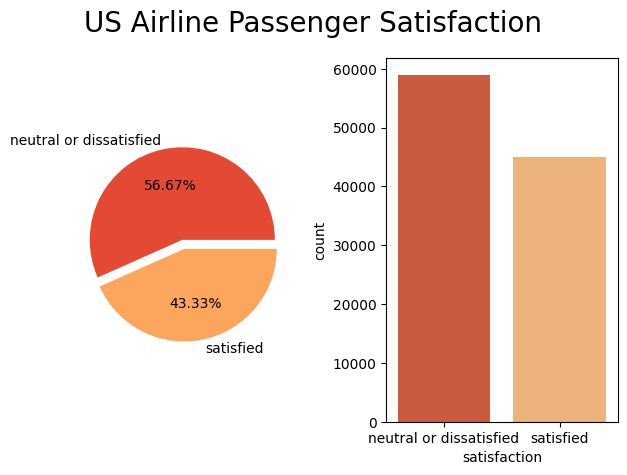

In [44]:
plt.figure().suptitle('US Airline Passenger Satisfaction', fontsize=20)
plt.subplot(1,2,1)
plt.pie(data['satisfaction'].value_counts(),explode= [0,0.1],labels=['neutral or dissatisfied','satisfied'],autopct='%.2f%%',colors = sns.color_palette("RdYlBu"))
plt.subplot(1,2,2)
sns.countplot(data=data, x='satisfaction',palette=['#E14D2A',"#FFB26B"])
plt.tight_layout()
plt.show()  

- Dari grafik diatas dapat dilihat bahwa lebih banyak penumpang yang netral atau tidak puas dengan pelayanan yang diberikan oleh maskapai penerbangan sampai saat ini, dengan persentase sebesar **56,67%** dari total populasi data.
- Maka dari itu dapat kita simpulkan bahwa perusahaan saat ini masih belum dapat memberikan pelayanan secara maksimal dan memuaskan penumpang mereka.
- Untuk perlu dilakukan perubahan pada pelayanan yang mereka berikan, agar dapat meningkatkan kepuasan penumpang.

### <span style='color:#FF8B13'>Faktor yang mempengaruhi kepuasan penumpang</span>
Faktor-faktor yang mempengaruhi kepuasan penumpang dapat dijadikan acuan untuk mengetahui aspek mana saja yang dapat dipertahankan dan aspek mana yang harus dilakukan perbaikan

Analisa faktor yang mempengaruhi kepuasan penumpang dilakukan dengan cara melakukan segmentasi penumpang sesuai klasifikasi penumpang seperti :
- usia
- tipe perjalanan (travel)
- jenis kelamin
- tipe kelas penerbangan
- tipe penumpang

Oleh karena itu, kita akan coba untuk selidiki layanan mana yang paling signifikan berpengaruh terhadap tiap kategori atau segmennya

##### <span style='color:#FF8B13'>Berdasarkan Gender</span>
Hal pertama yang akan dianalisa adalah apabila kepuasan penumpang dipengaruhi oleh gender. 

Data gender berisi *male*(laki-laki) dan *female*(perempuan). Untuk mengetahui value dan proporsi, digunakan fungsi tabel proporsi kepuasan. 

In [50]:
data_gender = pd.crosstab(data['Gender'], data['satisfaction'])
data_gender['total'] = data_gender['neutral or dissatisfied'] + data_gender['satisfied']
data_gender

satisfaction,neutral or dissatisfied,satisfied,total
Gender,,,
Female,30193,22534,52727
Male,28686,22491,51177


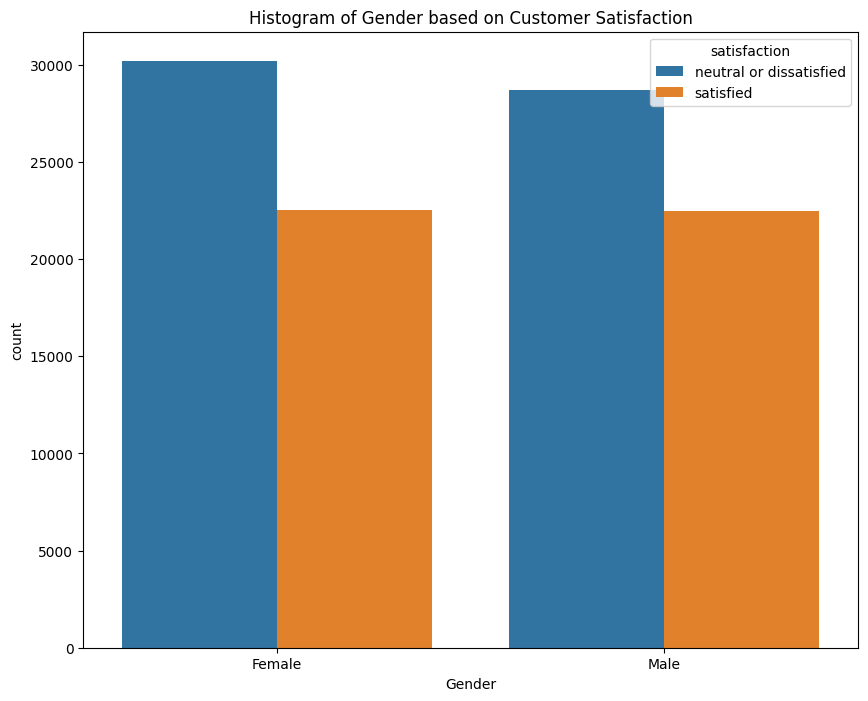

In [73]:
plt.figure(figsize = (10,8))
sns.countplot(data = data, x = 'Gender', hue = 'satisfaction')
plt.title('Histogram of Gender based on Customer Satisfaction')
plt.show()

In [56]:
score, pval, dof, exp = chi2_contingency(data_gender.drop('total', axis = 1))
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


- Dari grafik bisa kita dapatkan bahwa untuk masing-masing gender cenderung tidak puas dengan pelayanan yang diberikan. 

- Serta dari uji statistik diatas, dapat diketahui bahwa meskipun proporsi laki-laki dan perempuan hampir sama, tetapi hasil uji statistik adalah Tolak Ho atau tidak ada cukup bukti bahwa gender tidak mempengaruhi kepuasan pelanggan.

##### <span style='color:#FF8B13'>Berdasarkan Tipe Travel dan Class</span>
Selanjutnya akan diperhatikan apabila tipe travel mempengaruhi kepuasan penumpang

- Terdapat dua tipe travel yaitu Business Travel Dan Personal Travel. Pertama-tama akan dilihat proporsi dari masing-masing kategori seluruh penumpang.
- Serta untuk kelas penerbangan terbagi menjadi tiga kelas yaitu kelas bisnis, kelas ekonomi dan kelas ekonomi plus

In [74]:
pd.crosstab(data['satisfaction'], data['Type of Travel'])

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29909,28970
satisfied,41746,3279


Dari tabel diatas dapat terlihat bahwa Penumpang Perjalanan Bisnis terlihat lebih puas dengan layanan dari pihak maskapai dibandingkan Penumpang Perjalanan Pribadi.

In [75]:
pd.crosstab([data['Type of Travel'], data['Class']], data['satisfaction'])

satisfaction              neutral or dissatisfied  satisfied
Type of Travel  Class                                       
Business travel Business  13292                    34216    
                Eco       14257                    6000     
                Eco Plus  2360                     1530     
Personal Travel Business  1893                     264      
                Eco       23787                    2701     
                Eco Plus  3290                     314

- Terlihat bahwa pada kolom Business Traveler cenderung menggunakan kelas bisnis daripada kelas ekonomi, begitu pula sebaliknya dengan Personal Traveller, dimana mereka lebih cenderung bepergian dengan kelas ekonomi.
- Dalam pengaturan biasa, penumpang kelas bisnis diberikan layanan yang lebih baik daripada penumpang kelas ekonomi, yang tentunya memberikan kepuasan bagi pelanggan.

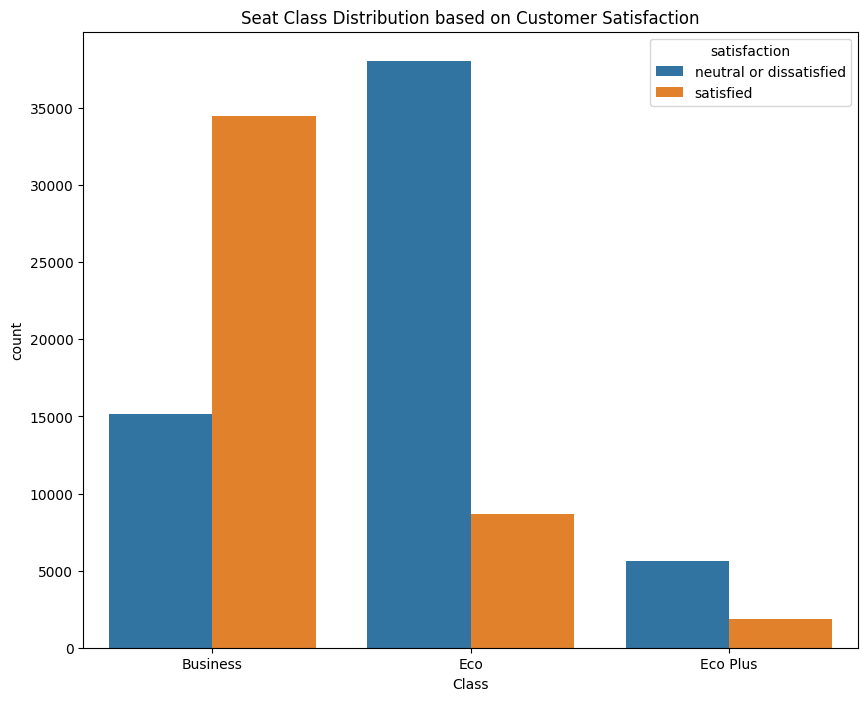

In [77]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Class', hue = 'satisfaction', data = data)
plt.title('Seat Class Distribution based on Customer Satisfaction')
plt.show()

Seperti dapat dilihat dari Histogram di atas, penumpang yang terbang menggunakan kelas ekonomi dan ekonomi plus sangat tidak puas dengan layanan yang diberikan oleh pihak maskapai, berbeda dengan penumpang yang terbang menggunakan kelas Bisnis lebih puas dengan jasa layanan maskapai berikan.

##### <span style='color:#FF8B13'>Berdasarkan Usia Penumpang</span>
Analisa usia penumpang terhadap kepuasan penumpang

Dari hasil survei, akan dilihat distribusi usia penumpang dikategorikan sesuai dengan kepuasan penumpang. 

Untuk segmentasi umur, kita akan membagi kategori umur sesuai yang biasanya digunakan dalam dunia pekerjaan.
Kategori umur biasanya terbagi atas 18-24, 25-34, 35-44, 45-54, 55-64, and 65 and seterusnya.

Oleh karena itu kita akan membuat kolom baru untuk kategori umur ini.

In [80]:
kategori_usia = []
for a in data['Age']:
  if a < 18:
    kategori_usia.append('<18')
  elif a >= 18 and a <= 24:
    kategori_usia.append('18-24')
  elif a >= 25 and a <= 34:
    kategori_usia.append('25-34')
  elif a >= 35 and a <= 44:
    kategori_usia.append('35-44')
  elif a >= 45 and a <= 54:
    kategori_usia.append('45-54')
  elif a >= 55 and a <= 64:
    kategori_usia.append('55-64')
  else:
    kategori_usia.append('65 and older')

data['age_category'] = kategori_usia
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,age_category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,neutral or dissatisfied,<18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,neutral or dissatisfied,25-34
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,satisfied,25-34
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,neutral or dissatisfied,25-34
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,satisfied,55-64


<AxesSubplot: xlabel='age_category', ylabel='count'>

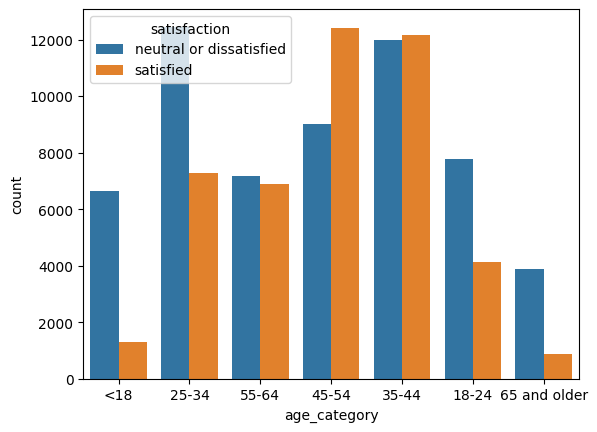

In [81]:
sns.countplot(data=data, x="age_category", hue="satisfaction")

Dari segmentasi umur diatas dapat kita bahwa penumpang yang mengisi survey dan merasa tidak puas sebagian besar ada pada kategori umur 25-34, 35-44 dan 45-54.

Berikut analisa data berdasarkan persebaran usia penumpang, untuk menjadi tambahan data dalam analisa dan pengambilan keputusan

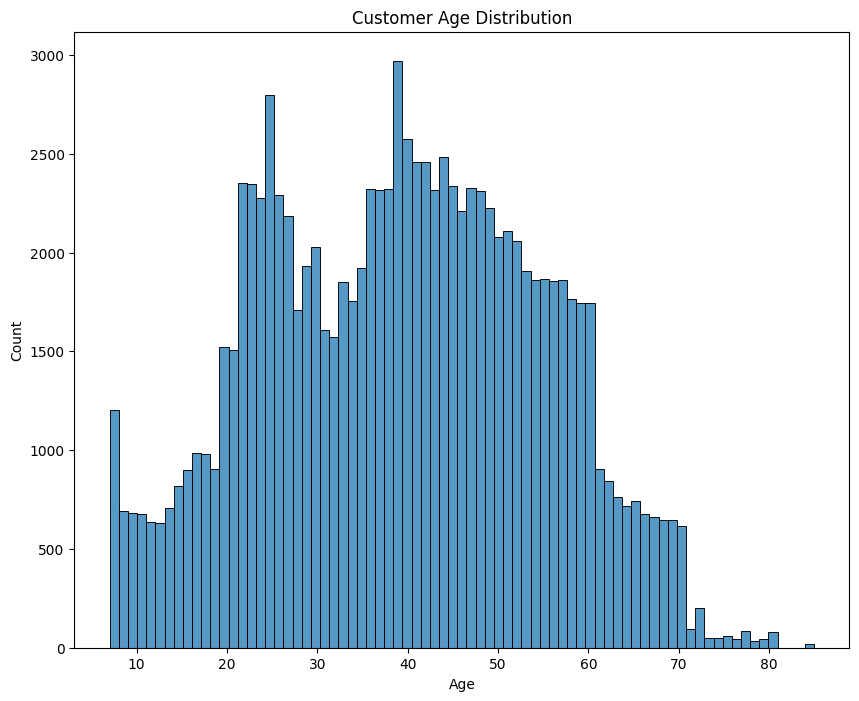

In [78]:
plt.figure(figsize = (10, 8))
sns.histplot(data['Age'])
plt.title('Customer Age Distribution')
plt.show()

Terlihat dari histogram di atas sebagian besar pelanggan yang terbang menggunakan maskapai ini sebagian besar berada dalam rentang usia sekitar 30 sampai 40 tahun.

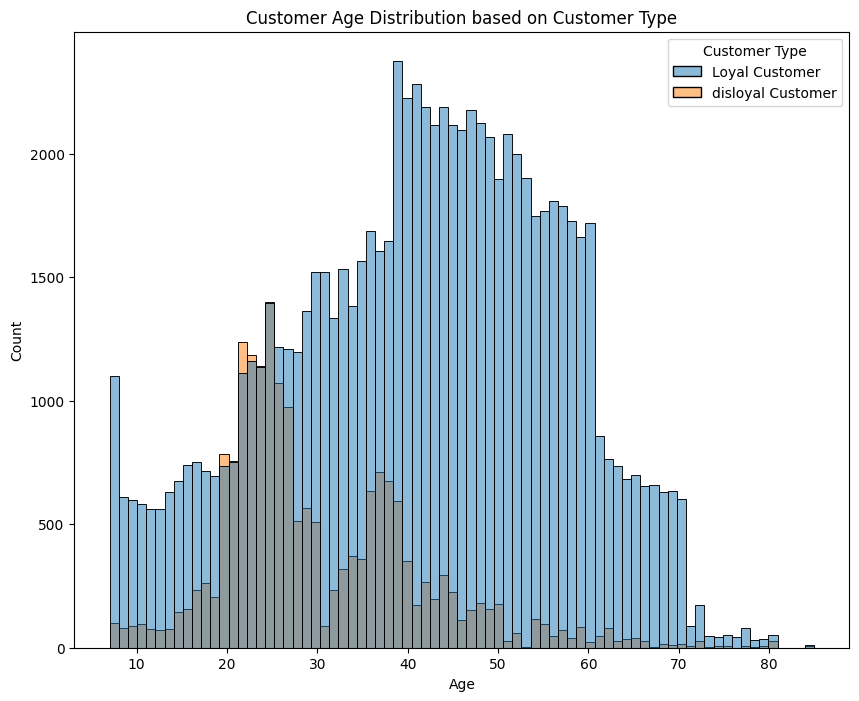

In [79]:
plt.figure(figsize = (10, 8))
sns.histplot(data = data, x = 'Age', hue = 'Customer Type')
plt.title('Customer Age Distribution based on Customer Type')
plt.show()

Dari grafik di atas bisa kita dapatkan bahwa, untuk penumpang setia sebagian besar berada pada rentang usia antara 40 hingga 60 tahun dan sebagian besar pelanggan yang tidak loyal berada pada rentang usia 20 hingga 30 tahun.

##### <span style='color:#FF8B13'>Berdasarkan Tipe Customer</span>
Berikutnya akan dianalisa pengaruh Tipe Customer pada kepuasan penumpang

Tipe Customer dibagi menjadi 2 kategori, yaitu loyal customer dan disloyal customer. Pelanggan setia penting bagi bisnis karena hubungan baik dengan pelanggan dapat membuat bisnis bertahan lama. Akan dilihat proporsi kepuasan penumpang berdasarkan tipe customer.

In [82]:
df_type = pd.crosstab(data['Customer Type'], data['satisfaction'])
df_type['total'] = df_type['neutral or dissatisfied'] + df_type['satisfied']
df_type

satisfaction,neutral or dissatisfied,satisfied,total
Customer Type,,,
Loyal Customer,44390,40533,84923
disloyal Customer,14489,4492,18981


Jumlah pelanggan yang loyal jauh lebih banyak dibandingkan dengan pelanggan yang tidak loyal.
Lebih baik jika dilakukan perbandingan secara proporsional.

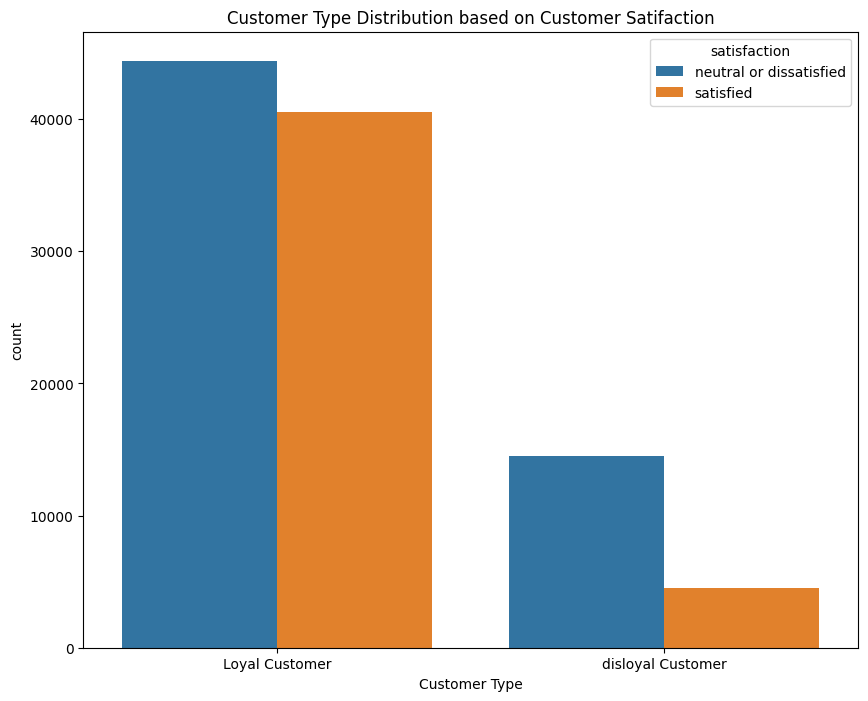

In [83]:
plt.figure(figsize = (10, 8))
sns.countplot(data = data, x = 'Customer Type', hue = 'satisfaction')
plt.title('Customer Type Distribution based on Customer Satifaction')
plt.show()

Dari grafik di atas terlihat jumlah pelanggan yang loyal jauh lebih tinggi daripada pelanggan yang tidak loyal, selanjutnya kita dapat menguji apakah proporsi pelanggan yang loyal merasa lebih puas dibandingkan dengan pelanggan yang tidak loyal.

In [89]:
stats, pval = proportions_ztest(df_type['satisfied'], df_type.sum(axis=1), alternative = 'smaller') 
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


- Baik dari hasil grafik maupun pengujian, dapat disimpulkan bahwa sebagian besar penumpang yang mengisi survei merupakan penumpang setia, atau penumpang yang telah menggunakan jasas penerbangan berulang kali/
- Serta dari pengujian tersebut dapat disimpulkan bahwa Tipe Customer memang memiliki berpengaruh pada tingkat kepuasan penumpang

##### <span style='color:#FF8B13'>Berdasarkan Flight Distance</span>
Akan dilakukan analisa apabila flight distance mempengaruhi kepuasan penumpang

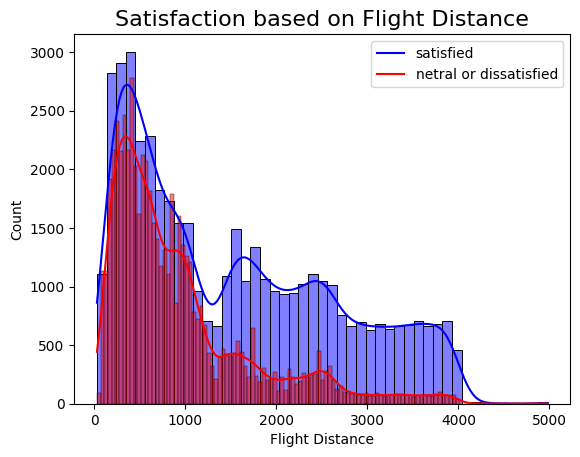

In [91]:
sns.histplot(x=data[data['satisfaction']=='satisfied']['Flight Distance'],kde=True,color='blue')
sns.histplot(x=data[data['satisfaction']=='neutral or dissatisfied']['Flight Distance'],kde=True,color='red')
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Flight Distance', fontsize=16)
plt.show()

Dapat dilihat pada grafik diatas, bahwa penumpang cenderung puas apabila mengikuti penerbangan jauh atau diatas 1500miles, dan banyak penumpang yang mengisi 'netral atau tidak puas' dibawah 1500miles. 

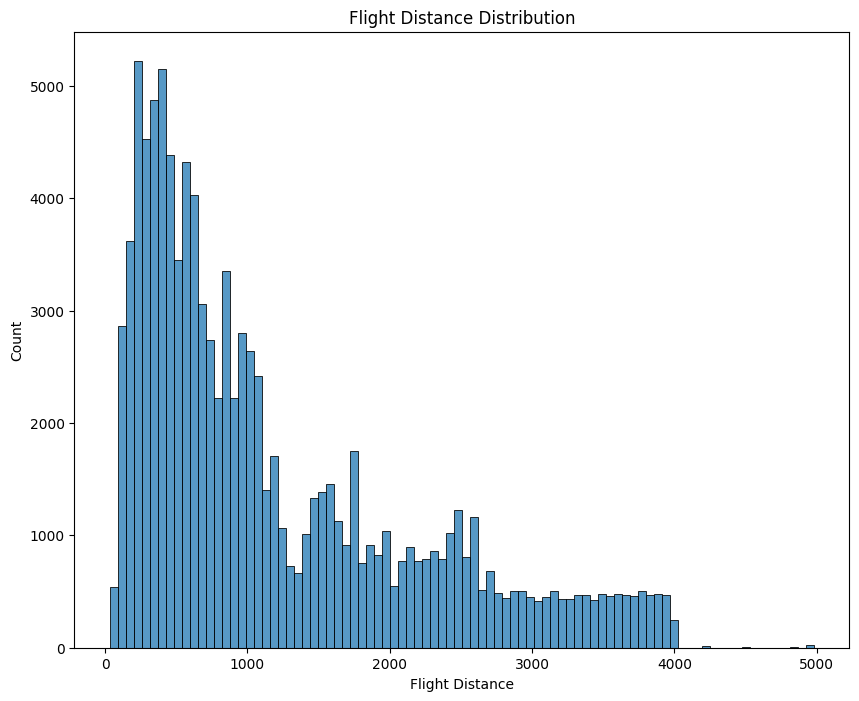

In [92]:
plt.figure(figsize = (10, 8))
sns.histplot(data['Flight Distance'])
plt.title('Flight Distance Distribution')
plt.show()

Dapat dilihat dari grafik di atas, bahwa sebagian besar penumpang penerbangan menggunakan jasa maskapai penerbangan untuk penerbangan yang lebih pendek sekitar 0 hingga 1000

Selanjutnya untuk melihat jenis kelas apa yang digunakan penumpang dengan jarak penerbangan berdasarkan jarak tempuhnya

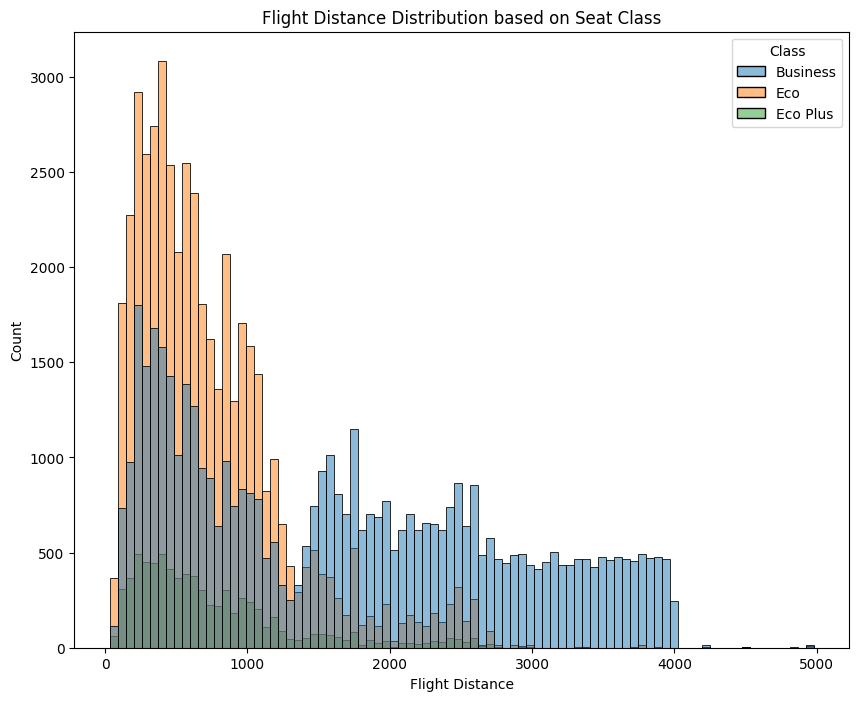

In [93]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'Flight Distance', hue = 'Class', data = data)
plt.title('Flight Distance Distribution based on Seat Class')
plt.show()

Bisa kita lihat dari hasil grafik diatas, didapatkan bahwa semakin jauhnya jarak penerbangan, maka sebagian besar penumpang akan mulai memilih untuk terbang menggunakan kelas bisnis.

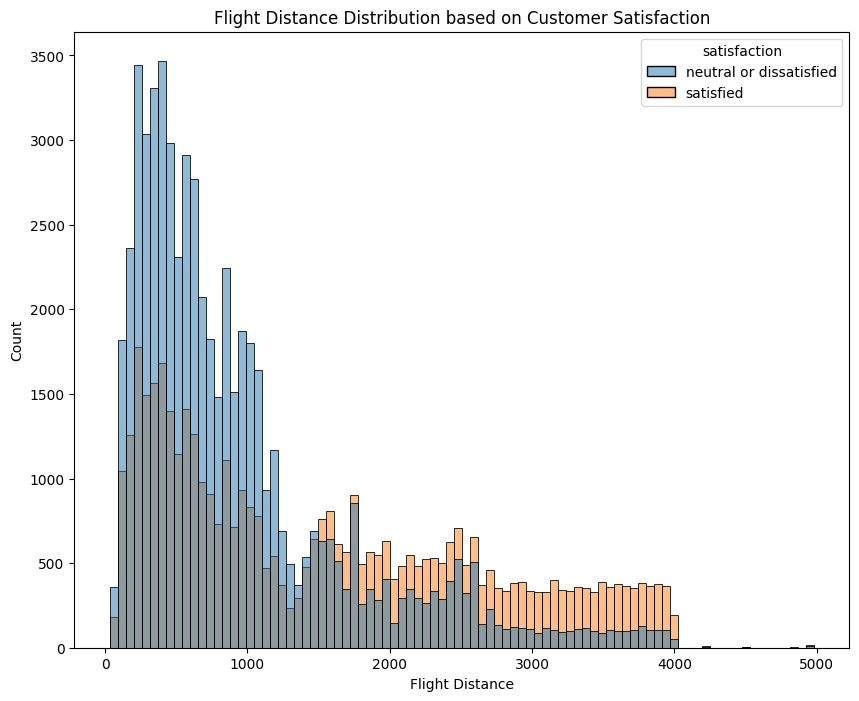

In [94]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'Flight Distance', hue = 'satisfaction', data = data)
plt.title('Flight Distance Distribution based on Customer Satisfaction')
plt.show()

Sedangkan dari hasil histogram diatas kita mendapatkan data bahwa semakin dekat jarak tempuh penerbangan, semakin banyak juga penumpang yang merasakan tidak puas / netral.

#### <span style='color:#FF8B13'>Berdasarkan Rating Kepuasan Penumpang</span>
Pertama, kita pisahkan semua nilai peringkat kepuasan pelanggan menjadi satu kerangka data sehingga kita dapat menggunakan kolom kerangka data tersebut untuk membuat histogram berdasarkan peringkat kepuasan pelanggan

In [96]:
data_rating = data.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'satisfaction'], axis = 1)
data_rating

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,age_category
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,<18
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,25-34
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,25-34
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,25-34
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,55-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,18-24
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,45-54
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,25-34
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,18-24


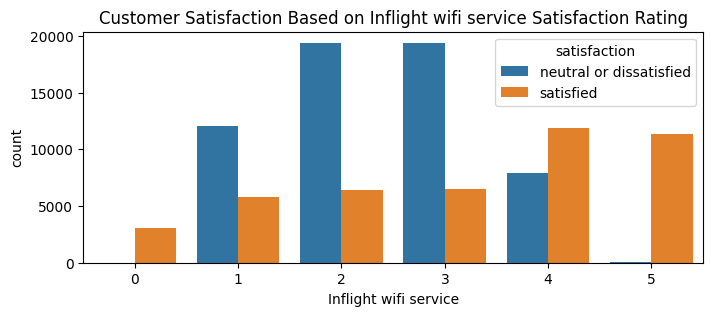

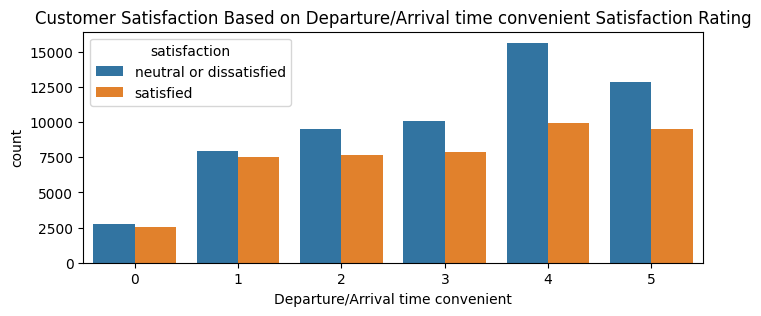

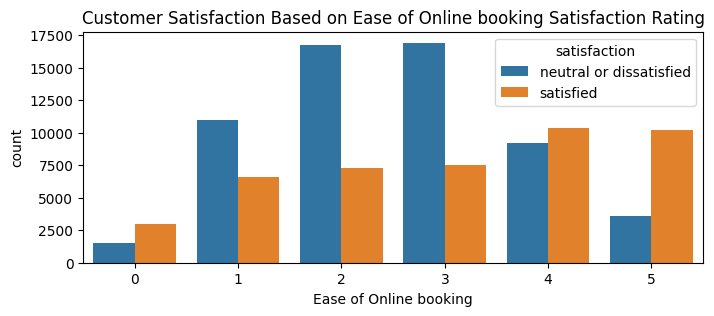

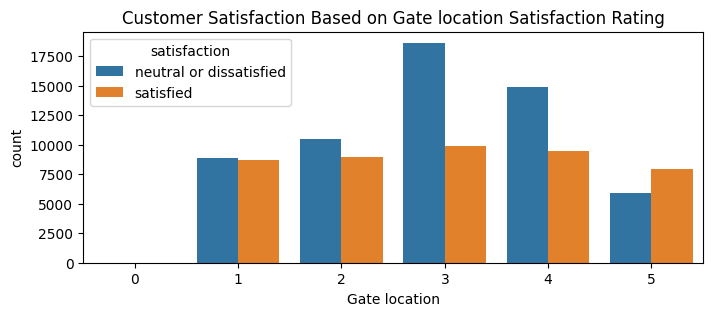

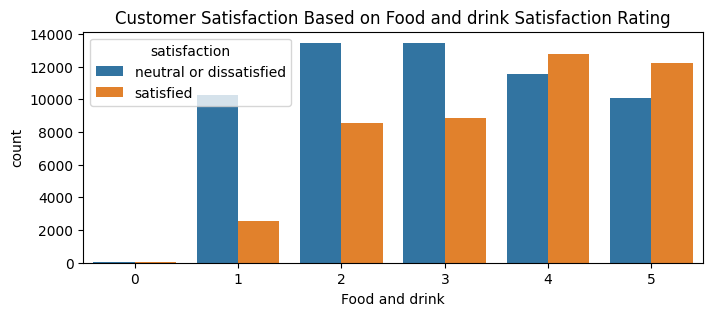

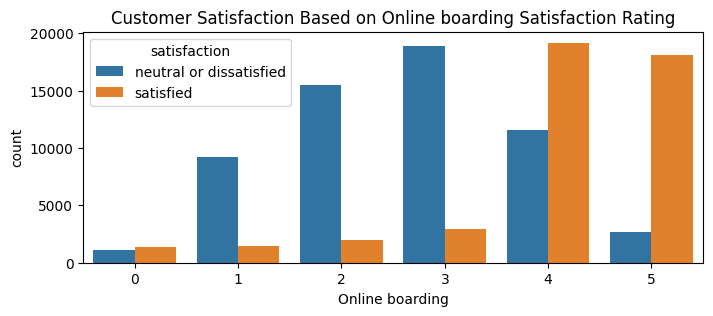

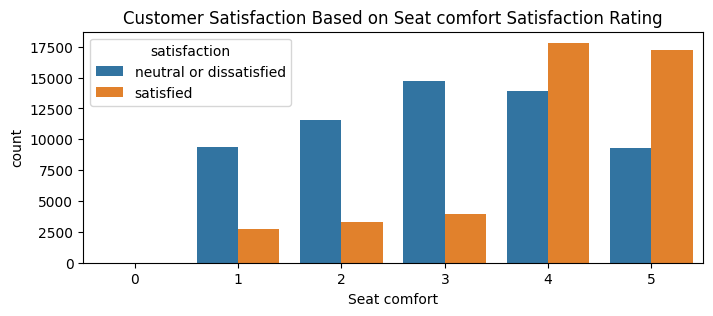

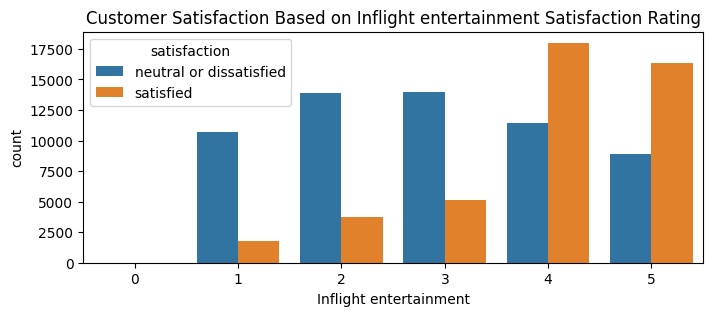

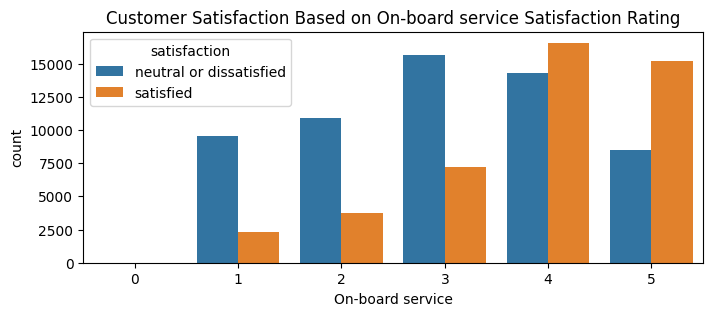

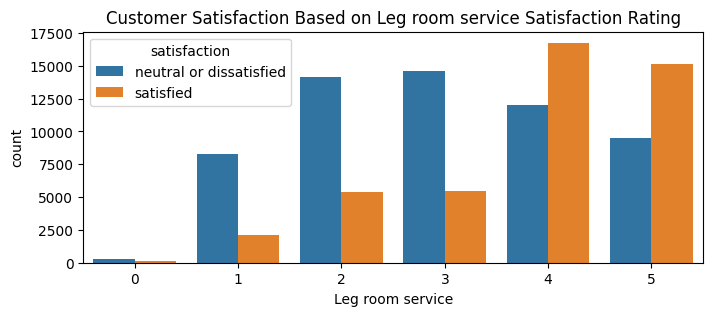

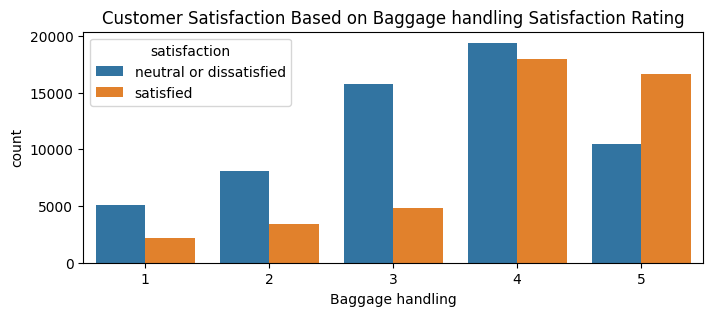

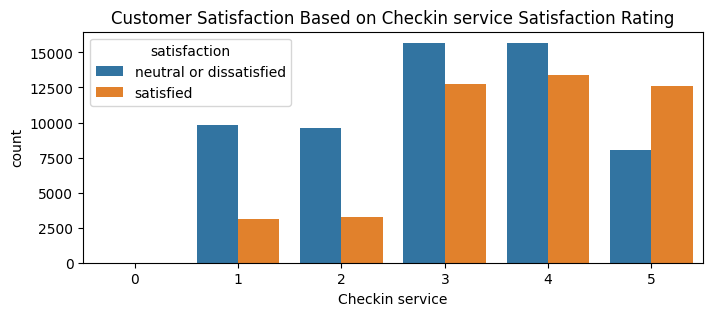

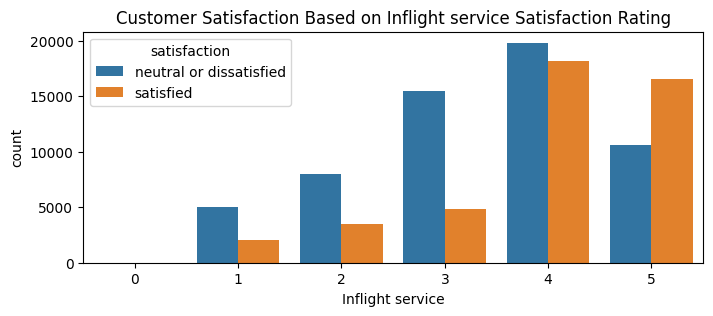

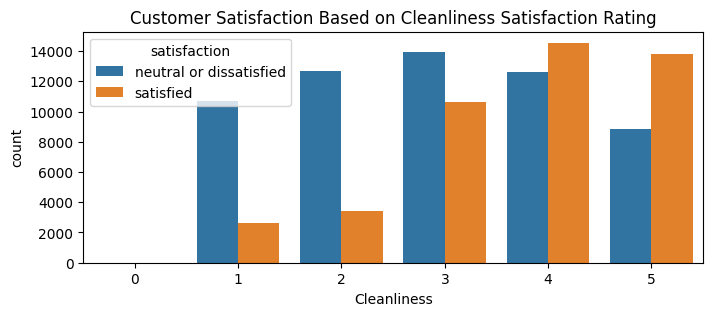

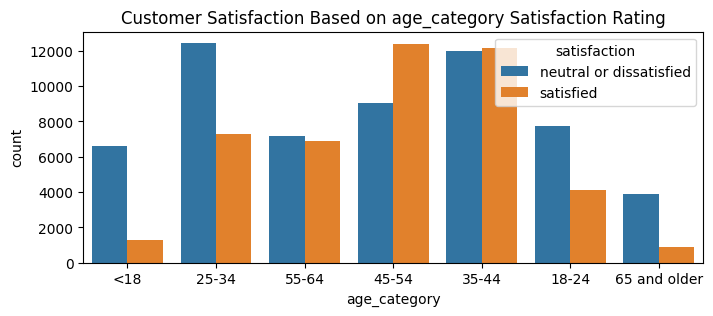

In [101]:
for i in data_rating.columns:
    plt.figure(figsize = (8, 3))
    sns.countplot(data = data, x = i, hue = 'satisfaction')
    plt.title('Customer Satisfaction Based on {} Satisfaction Rating'.format(i))
    plt.show()

Selain hal dari segmentasi diatas, bisa kita lihat nilai rating secara general. Dapat terlihat bahwa departure and arrival time tidak memberikan banyak pengaruh terhadap kepuasan pelanggan karena banyaknya yang memberikan nilai 4 dan 5 tetapi tetap tidak merasa puas.
Maka dari itu untuk kolom Departure Delay in Minutes tidak dilakukan analisa lebih lanjut. 

Dapat diketahui juga bahwa nilai yang baik secara general diberikan seperti pada layanan kenyamanan kursi, penanganan bagasi, pelayanan dalam penerbangan, hiburan dalam penerbangan, kebersihan, online boarding, dan pelayanan ruang kaki.

Dari hasil ini dapat dilihat bahwa terdapat beberapa faktor berbeda yang dipengaruhi berdasarkan kelompok tipe pribadi atau pengguna ekonomi, sehingga dapat disimpulkan bahwa pada kelas bisnis terdapat service yang lebih baik dibanding kelas lainnya, seperti :
* wifi pesawat
* kenyamanan kursi
* pelayanan ruang kaki
* pelayanan dalam penerbangan

## <span style='color:#FF8B13'>Kesimpulan dan Rekomendasi</span>
Setelah dilakukan analisa, berikut kesimpulan dan rekomendasi yang bisa diberikan untuk meningkatkan pelayanan Maskapai Penerbangan AS

#### <span style='color:#FF8B13'> Kesimpulan </span>

**Adapun kesimpulan yang didapat dari hasil analisa, antara lain:**  

- Penumpang maskapai penerbangan cenderung netral atau tidak puas terhadap jasa pelayanan yang diberikan, dengan persentase hasil yang didapatkan yaitu sebesar **56,7%**

- Jumlah penumpang loyal lebih banyak dibanding penumpang yang tidak loyal.
 * Hal ini bisa saja karena lebih banyak penumpang lama yang menggunakan jasa Maskapai penerbangan AS ini dan kurangnya jumlah peminat atau penumpang baru.
 * Hal ini juga didorong dengan proporsi penumpang yang tidak loyal memberikan penilaian netral dan tidak puas cukup signifikan, dan dapat diartikan bahwa pelayanan yang diberikan oleh pihak maskapai kurang sesuai dengan harapan penumpang. 

- Dari faktor usia pemberi nilai tidak puas didominasi oleh penumpang dengan range usia produktif yaitu usia 25-34, 35-44 dan 45-54. Serta kelompok tersebut termasuk kelompok yang mendominasi pasar penumpang yang merasa pelayanan tidak memenuhi harapan.

- Penumpang dengan tujuan travel personal lebih tidak puas dibandingkan penumpang dengan tujuan bisnis, hal ini disebabkan karena tujuan travel personal lebih banyak menggunakan kelas ekonomi.

- Orang yang menggunakan kelas bisnis cenderung puas dengan pelayanan yang diberikan, dan semakin jauh destinasi, orang cenderung menggunakan kelas bisnis.
  
**Faktor yang mempengaruhi kepuasan penumpang:**

* Tingkatan umur penumpang, tipe perjalanan penerbangan,jarak tempuh dari perjalanan, serta jenis kelas penerbangannya. Karena jenis kelas ini cukup menentukan akan jasa serta fasilitas yang bisa penumpang dapatkan.
* Jaringan wifi dalam penerbangan, booking secara online dan boarding secara online juga merupakan faktor penentu, dimana 3 jenis layanan ini merupakan entertainment yg maskapai bisa berikan dan cukup berpengaruh terhadap tingkat kepuasan penumpang.
* Ruang kaki, pelayanan selama penerbangan dan penanganan bagasi merupakan hal yang tidak cukup urgent bagi pihak maskapai untuk dapat menjadi bahan pertimbangan.


#### Rekomendasi

Adapun rekomendasi yang dapat diberikan sebagai berikut :
- Hal yang paling harus diperhatikan adalah mengganti atau memperbaiki fasilitas wifi dalam penerbangan dengan kualitas yang lebih baik lagi.
- Lalu dari segi fitur dalam kemudahan booking secara online dan boarding secara online, yang dapat ditingkatkan dan lebih customer friendly, sehingga memudahkan penumpang dalam melakukan online booking dan online boarding.
- Lokasi gate pun dapat menjadi bahan pertimbangan untuk bisa disesuaikan agar tidak jauh dari pesawat, sehingga tidak membuat penumpang kelelahan saat hendak menaikin atau turun dari pesawat.
- Mulai memikirkan untuk membenahi standar pelayanan kelas ekonomi, agara dapat bersaing dengan kelas Business yang memiliki tingkat kepuasan lebih baik. Mengingat pengguna kelas ekonomi mendominasi pasar dan tidak puas terhadap layanan sekarang.
- Strategi marketing dapat menggunakan kelompok usia muda dan pekerja awal sebagai target pasar untuk mencari main customer baru dan diharapkan dapat membuat disloyal customer menjadi loyal customer.


Dengan mencari faktor yang mempengaruhi kepuasan penumpang, diharapkan analisa ini dapat membantu meningkatkan kualitas pelayanan Maskapai Penerbangan AS

Dengan berfokus pada beberapa layanan dan target penumpang yang spesifik, diharapkan analisis ini dapat membantu maskapai untuk mengerti layanan-layanan yang dibutuhkan oleh para penumpang, serta dengan tepat dapat meningkatkan layanan-layanan tersebut.